In [1]:
import rpy2.robjects as robjects
import rpy2.robjects.lib.ggplot2 as ggplot2

%load_ext rpy2.ipython

/usr/lib/python3/dist-packages/rpy2/robjects/lib/ggplot2.py:71: UserWarning: This was designed againt ggplot2 version 3.2.1 but you have 3.3.0
  warnings.warn('This was designed againt ggplot2 version %s but you '
/usr/lib/python3/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/lib/python3/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [2]:
%R print(c(1, 2))

[1] 1 2


array([1., 2.])

In [5]:
%%R
seq.data <- read.delim('sequence.index', header=TRUE, stringsAsFactors=FALSE)
seq.data$READ_COUNT <- as.integer(seq.data$READ_COUNT)
seq.data$BASE_COUNT <- as.integer(seq.data$BASE_COUNT)

In [6]:
seq_data = %R seq.data
print(type(seq_data)) # pandas dataframe!

<class 'pandas.core.frame.DataFrame'>


In [7]:
my_col = list(seq_data.columns).index("CENTER_NAME")
seq_data['CENTER_NAME'] = seq_data['CENTER_NAME'].apply(lambda x: x.upper())

In [8]:
%R -i seq_data
%R print(colnames(seq_data))

 [1] "FASTQ_FILE"          "MD5"                 "RUN_ID"             
 [4] "STUDY_ID"            "STUDY_NAME"          "CENTER_NAME"        
 [7] "SUBMISSION_ID"       "SUBMISSION_DATE"     "SAMPLE_ID"          
[10] "SAMPLE_NAME"         "POPULATION"          "EXPERIMENT_ID"      
[13] "INSTRUMENT_PLATFORM" "INSTRUMENT_MODEL"    "LIBRARY_NAME"       
[16] "RUN_NAME"            "RUN_BLOCK_NAME"      "INSERT_SIZE"        
[19] "LIBRARY_LAYOUT"      "PAIRED_FASTQ"        "WITHDRAWN"          
[22] "WITHDRAWN_DATE"      "COMMENT"             "READ_COUNT"         
[25] "BASE_COUNT"          "ANALYSIS_GROUP"     


array(['FASTQ_FILE', 'MD5', 'RUN_ID', 'STUDY_ID', 'STUDY_NAME',
       'CENTER_NAME', 'SUBMISSION_ID', 'SUBMISSION_DATE', 'SAMPLE_ID',
       'SAMPLE_NAME', 'POPULATION', 'EXPERIMENT_ID',
       'INSTRUMENT_PLATFORM', 'INSTRUMENT_MODEL', 'LIBRARY_NAME',
       'RUN_NAME', 'RUN_BLOCK_NAME', 'INSERT_SIZE', 'LIBRARY_LAYOUT',
       'PAIRED_FASTQ', 'WITHDRAWN', 'WITHDRAWN_DATE', 'COMMENT',
       'READ_COUNT', 'BASE_COUNT', 'ANALYSIS_GROUP'], dtype='<U19')

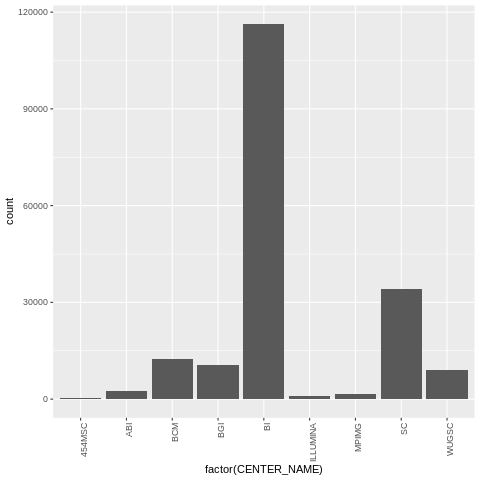

In [9]:
%%R
bar <- ggplot(seq_data) + aes(factor(CENTER_NAME)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
print(bar)